**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

**Entregable 2 - Parte 1**

**Grupo 27:**

**Guillermo Alonso**

**María Eugenia Bernaschini**

**Juan Cruz Bordón**

**Javier Carabajal**

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas
import plotly
import seaborn
seaborn.set_context('talk')

from sqlalchemy import create_engine, text


In [ ]:
df_melb = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
df_melb[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


* Verificamos las Columnas que tienen 





In [ ]:
list(df_melb.columns)


['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [ ]:
df_melb['Postcode'].value_counts()

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3340.0      1
3158.0      1
3808.0      1
3777.0      1
3793.0      1
Name: Postcode, Length: 198, dtype: int64

In [ ]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
df_airbnb = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
list(df_airbnb.columns)

['description',
 'neighborhood_overview',
 'street',
 'neighborhood',
 'city',
 'suburb',
 'state',
 'zipcode',
 'latitude',
 'longitude',
 'price',
 'weekly_price',
 'monthly_price']

In [ ]:
df_airbnb['zipcode'].value_counts()

3000.0        2491
3000           876
3006.0         860
3182.0         579
3182           556
              ... 
3096             1
3812             1
3000\n3000       1
3752             1
4068.0           1
Name: zipcode, Length: 463, dtype: int64

* Hacemos que todos los valores sean del mismo tipo

In [ ]:
df_airbnb['zipcode'] = pandas.to_numeric(df_airbnb.zipcode, errors='coerce')

In [ ]:
df_airbnb['zipcode'].value_counts()

3000.0     3367
3006.0     1268
3182.0     1135
3141.0      881
3004.0      728
           ... 
3785.0        1
3096.0        1
30122.0       1
3912.0        1
4068.0        1
Name: zipcode, Length: 247, dtype: int64

* Descargamos el csv normalizado y luego lo volvemos a levantar para pasarlo a tabla

In [ ]:
df_airbnb.to_csv("df_airbnb_NormalizadoZipCod.csv", index=None)

In [ ]:
from google.colab import files
files.download("df_airbnb_NormalizadoZipCod.csv")

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
# df_n_airbnb = pandas.read_csv('df_airbnb_NormalizadoZipCod.csv')
df_n_airbnb = df_airbnb


In [ ]:
list(df_n_airbnb.columns)

['description',
 'neighborhood_overview',
 'street',
 'neighborhood',
 'city',
 'suburb',
 'state',
 'zipcode',
 'latitude',
 'longitude',
 'price',
 'weekly_price',
 'monthly_price']

In [ ]:
df_n_airbnb['zipcode'].value_counts()

3000.0     3367
3006.0     1268
3182.0     1135
3141.0      881
3004.0      728
           ... 
3785.0        1
3096.0        1
30122.0       1
3912.0        1
4068.0        1
Name: zipcode, Length: 247, dtype: int64

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [ ]:
engine = create_engine('sqlite:///Grupo_27.sqlite3', echo=True)

In [ ]:
df_melb.to_sql('tabla_melb_data', con=engine, if_exists="replace")

2022-05-18 17:55:02,597 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("tabla_melb_data")
2022-05-18 17:55:02,598 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 17:55:02,600 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("tabla_melb_data")
2022-05-18 17:55:02,602 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 17:55:02,614 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-18 17:55:02,617 INFO sqlalchemy.engine.Engine 
CREATE TABLE tabla_melb_data (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-18 17:55:02,619 INFO sqlalchemy.engine.Engine [no key 0.00265s] ()
2022-05-18 17:55

In [ ]:
q1="SELECT *  FROM tabla_melb_data LIMIT 10 "

In [ ]:
with engine.connect() as con:
    #for query in q1:
      rs = con.execute(q1)
      for row in rs:
          print(row)

    

2022-05-18 17:55:03,312 INFO sqlalchemy.engine.Engine SELECT *  FROM tabla_melb_data LIMIT 10 
2022-05-18 17:55:03,318 INFO sqlalchemy.engine.Engine [raw sql] ()
(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0)
(1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0)
(2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0)
(3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0)
(4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson'

* Creamos la tabla de airbnb con los ZipCod normalizados

In [ ]:
df_n_airbnb.to_sql('tabla_df_n_airbnb', con=engine, if_exists="replace")

2022-05-18 17:55:03,363 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("tabla_df_n_airbnb")
2022-05-18 17:55:03,364 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 17:55:03,371 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("tabla_df_n_airbnb")
2022-05-18 17:55:03,375 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-18 17:55:03,380 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-18 17:55:03,382 INFO sqlalchemy.engine.Engine 
CREATE TABLE tabla_df_n_airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode FLOAT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)


2022-05-18 17:55:03,387 INFO sqlalchemy.engine.Engine [no key 0.00445s] ()
2022-05-18 17:55:03,402 INFO sqlalchemy.engine.Engine CREATE INDEX ix_tabla_df_n_airbnb_index ON tabla_df_n_airbnb ("index")
2022-05-18 17:55:03,403 INFO sqlalchemy.engine.E

# -**Cantidad de registros totales por ciudad.**




In [ ]:
C1="""
SELECT 
  city,
  COUNT(A.city)
FROM tabla_df_n_airbnb A INNER JOIN tabla_melb_data b 
  on a.zipcode=b.Postcode 
GROUP BY city """

In [ ]:
with engine.connect() as con:
    #for query in q1:
      rs = con.execute(C1)
      print(' City    Cantidad')
      for row in rs:
          print(row)

2022-05-18 17:55:04,465 INFO sqlalchemy.engine.Engine 
SELECT 
  city,
  COUNT(A.city)
FROM tabla_df_n_airbnb A INNER JOIN tabla_melb_data b 
  on a.zipcode=b.Postcode 
GROUP BY city 
2022-05-18 17:55:04,468 INFO sqlalchemy.engine.Engine [raw sql] ()
 City    Cantidad
('Banyule', 25811)
('Bayside', 44709)
('Boroondara', 100241)
('Brimbank', 17517)
('Cardinia', 127)
('Casey', 1147)
('Darebin', 132271)
('Frankston', 4842)
('Glen Eira', 86747)
('Greater Dandenong', 2497)
('Hobsons Bay', 26421)
('Hume', 6549)
('Kingston', 10629)
('Knox', 3270)
('Manningham', 22708)
('Maribyrnong', 84478)
('Maroondah', 3520)
('Melbourne', 323113)
('Melton', 2402)
('Monash', 31703)
('Moonee Valley', 69999)
('Moreland', 181787)
('Nillumbik', 1314)
('Port Phillip', 317865)
('Stonnington', 282675)
('Whitehorse', 31562)
('Whittlesea', 4814)
('Wyndham', 23275)
('Yarra', 295074)
('Yarra Ranges', 597)


# -**Cantidad de registros totales por barrio y ciudad**

In [ ]:
# Unimos las tablas con el inner join
C2="""
SELECT
  neighborhood,
  city,
  COUNT(A.city)
FROM tabla_df_n_airbnb A INNER JOIN tabla_melb_data b 
  on a.zipcode=b.Postcode 
GROUP BY 
  neighborhood,
  city """

* Sacamos los barrios  con null

In [ ]:
C3="""
SELECT
  neighborhood,
  city,
  COUNT(A.city)
FROM tabla_df_n_airbnb A INNER JOIN tabla_melb_data b 
  on a.zipcode=b.Postcode 
WHERE neighborhood IS NOT NULL
GROUP BY 
  neighborhood,
  city """

In [ ]:
with engine.connect() as con:
    #for query in q1:
      rs = con.execute(C2)
      print(' neighborhood   city  Cantidad'   )
      for row in rs:
          print(row)

2022-05-18 17:55:05,689 INFO sqlalchemy.engine.Engine 
SELECT
  neighborhood,
  city,
  COUNT(A.city)
FROM tabla_df_n_airbnb A INNER JOIN tabla_melb_data b 
  on a.zipcode=b.Postcode 
GROUP BY 
  neighborhood,
  city 
2022-05-18 17:55:05,691 INFO sqlalchemy.engine.Engine [raw sql] ()
 neighborhood   city  Cantidad
(None, 'Banyule', 21679)
(None, 'Bayside', 10299)
(None, 'Boroondara', 4423)
(None, 'Brimbank', 17517)
(None, 'Cardinia', 127)
(None, 'Casey', 1147)
(None, 'Darebin', 24680)
(None, 'Frankston', 4842)
(None, 'Glen Eira', 4394)
(None, 'Greater Dandenong', 2497)
(None, 'Hobsons Bay', 4838)
(None, 'Hume', 6549)
(None, 'Kingston', 9374)
(None, 'Knox', 3270)
(None, 'Manningham', 21302)
(None, 'Maribyrnong', 10560)
(None, 'Maroondah', 3520)
(None, 'Melbourne', 10851)
(None, 'Melton', 2402)
(None, 'Monash', 27243)
(None, 'Moonee Valley', 27757)
(None, 'Moreland', 28761)
(None, 'Nillumbik', 1314)
(None, 'Port Phillip', 14715)
(None, 'Stonnington', 10049)
(None, 'Whitehorse', 27635)
(N

* Barrios sin null

In [ ]:
with engine.connect() as con:
    #for query in q1:
      rs = con.execute(C3)
      print(' neighborhood   city  Cantidad'   )
      for row in rs:
          print(row)

2022-05-18 17:55:08,297 INFO sqlalchemy.engine.Engine 
SELECT
  neighborhood,
  city,
  COUNT(A.city)
FROM tabla_df_n_airbnb A INNER JOIN tabla_melb_data b 
  on a.zipcode=b.Postcode 
WHERE neighborhood IS NOT NULL
GROUP BY 
  neighborhood,
  city 
2022-05-18 17:55:08,299 INFO sqlalchemy.engine.Engine [raw sql] ()
 neighborhood   city  Cantidad
('Abbotsford', 'Yarra', 15763)
('Albert Park', 'Port Phillip', 7291)
('Alphington', 'Banyule', 1968)
('Alphington', 'Darebin', 1694)
('Alphington', 'Yarra', 1232)
('Armadale', 'Stonnington', 6439)
('Ashburton', 'Boroondara', 1484)
('Ashburton', 'Monash', 424)
('Balaclava/Ripponlea', 'Glen Eira', 103)
('Balaclava/Ripponlea', 'Port Phillip', 5707)
('Balwyn', 'Boroondara', 8130)
('Balwyn', 'Whitehorse', 2862)
('Balwyn North', 'Boroondara', 6669)
('Balwyn North', 'Manningham', 1406)
('Bentleigh', 'Bayside', 155)
('Bentleigh', 'Glen Eira', 20079)
('Bentleigh', 'Kingston', 1255)
('Bentleigh', 'Monash', 332)
('Brighton', 'Bayside', 34124)
('Brighton', 

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### Ejercicio 2: 1) Selección de columnas relevantes.

In [ ]:
# Listado de las columnas de df_melb
df_melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Las columnas que creemos relevantes de la base df_melb para predecir el valor de las propiedades son: 

* **Suburb:**  zona residencial en donde se encuentra ubicada la propiedad.
* **Regionname:** nombre de la región general (Norte, Sur, etc.).
* **Rooms:** cantidad de ambientes que tiene la casa.
* **Type:** tipo de vivienda (casa, departamento, chalé, etc.).
* **Price:** precio al que fue vendida la propiedad.
* **Date:** fecha de venta, ya que tiene que ver con las condiciones del mercado.
* **Distance:** distancia al distrito financiero. 
* **Postcode:** código postal que usaremos para combinar las bases y tiene que ver con la ubicación de la propiedad.
* **Bedroom2:** cantidad de habitaciones.
* **Bathroom:** cantidad de baños.
* **Car:** cantidad de cocheras.
* **Landsize:** tamaño del terreno.
* **BuildingArea:** tamaño del terreno edificado.
* **YearBuilt:** año de construcción de la propiedad.
* **Lattitude:** latitud, tiene que ver con la ubicación de la propiedad.
* **Longtitude:** longitud, tiene que ver con la ubicación de la propiedad.
* **Propertycount:** cantidad de propiedades que hay en el suburb.

Las columnas seleccionadas tienen que ver con la ubicación de la propiedad y con las características de la misma y de su entorno, con lo cual creemos que son relevantes para predecir el valor del inmueble. 

Las columnas que no fueron seleccionadas son:

* **Address:** si bien tiene que ver con la ubicación del inmueble (dirección), es una variable difícil de trabajar por su gran variabilidad.
* **Method:** tiene que ver con la forma en la que fue vendida la propiedad.
* **SellerG:** agencia que llevó a cabo la venta. 
* **CouncilArea:** esta variable no la seleccionamos ya que creemos que está relacionada con la variable Suburb. 


In [ ]:
# Columnas relevantes de df_melb
relevant_cols = ['Suburb','Regionname','Rooms','Type', 'Price', 'Date','Distance' ,'Postcode','Bedroom2', 'Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']

In [ ]:
# Nos quedamos con las columnas relevantes de df_melb
df_melb = df_melb[relevant_cols]

**Exploración de la variable Price**

In [ ]:
# Medidas resumen de la variable Price
df_melb['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

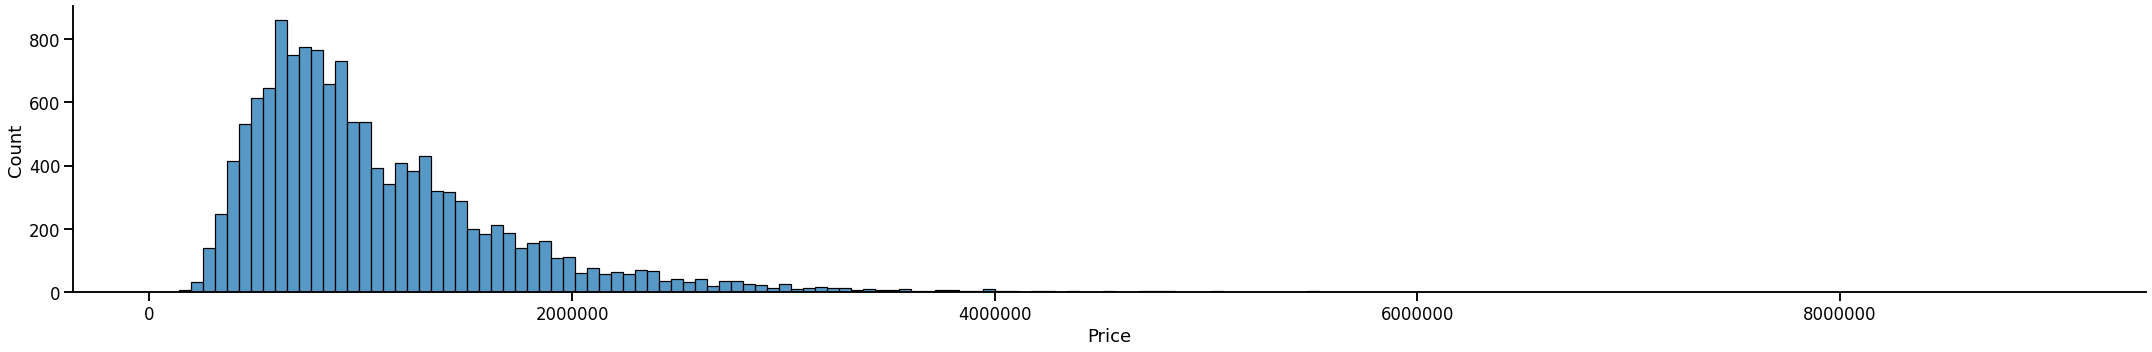

In [ ]:
# Distribución de la variable Price
seaborn.displot(df_melb['Price'], aspect=6)
plt.ticklabel_format(style='plain', axis='x')

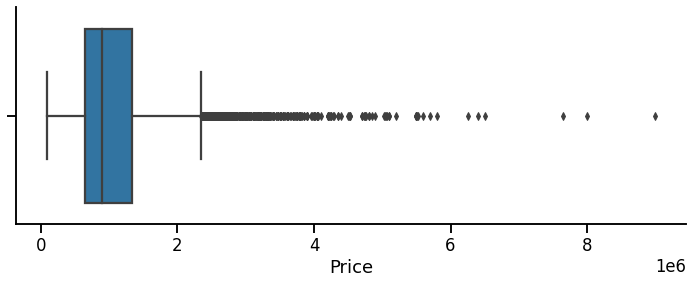

In [ ]:
# Boxplot para la variable Price
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_melb['Price'])
seaborn.despine()

In [ ]:
# Algunos cuantiles de la variable Price
df_melb['Price'].quantile([.95, .98, .99, .996, .998])

0.950    2290050.0
0.980    2865360.0
0.990    3338150.0
0.996    4003420.0
0.998    4747630.0
Name: Price, dtype: float64

Consideramos como valores extremos de la variable Price a aquellos precios que superan al cuantil 0,996. 

In [ ]:
# Eliminamos los valores extremos de la variable Price
q996=df_melb['Price'].quantile(0.996)
df_melb = df_melb[df_melb['Price']<=q996]

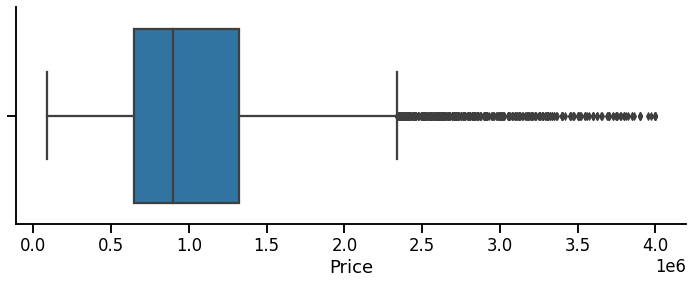

In [ ]:
# Boxplot para la variable Price sin valores extremos
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_melb['Price'])
seaborn.despine()

**Exploración de la variable Suburb**

In [ ]:
# Freciuencias absolutas Suburb para df_melb
Suburb_count = df_melb.Suburb.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Suburb', 'Suburb': 'frequency'})
Suburb_count[:51]

,Suburb,frequency
0,Reservoir,359
1,Richmond,260
2,Bentleigh East,249
3,Preston,239
4,Brunswick,222
5,Essendon,220
6,South Yarra,201
7,Glen Iris,195
8,Coburg,190
9,Northcote,187


In [ ]:
# Distribución de las frecuencias de Suburb
Suburb_count['frequency'].value_counts()

1      21
2      15
4      14
5      10
6      10
       ..
102     1
105     1
110     1
111     1
64      1
Name: frequency, Length: 115, dtype: int64

In [ ]:
# Medidas resumen para la frecuencia de Suburb
df_melb.Suburb.value_counts().describe()

count    314.000000
mean      43.073248
std       54.887550
min        1.000000
25%        6.250000
50%       20.000000
75%       58.750000
max      359.000000
Name: Suburb, dtype: float64

Quitamos de la base df_melb los suburbs con frecuencias menores a 10, ya que consideramos que están poco representados.

In [ ]:
# Quitamos de la base df_melb los suburbs con frecuencia menor a 10.
Suburb_principales= Suburb_count[Suburb_count['frequency'] >= 10]

df_melb = df_melb[df_melb['Suburb'].isin(Suburb_principales['Suburb'])]

In [ ]:
len(df_melb)

13096

### Ejercicio 2: 2) Agregado de información adicional de la base df_airbnb.

In [ ]:
# Lista de columnas de df_airbnb
df_airbnb.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

In [ ]:
# Selección de columnas relevantes de la base df_airbnb
relevant_cols = ['zipcode','price',
       'weekly_price', 'monthly_price']

**Exploración de la variable price de df_airbnb**

In [ ]:
# Medidas resumen de la variable price
df_airbnb['price'].describe()

count    22895.000000
mean       148.004368
std        210.883253
min          0.000000
25%         71.000000
50%        111.000000
75%        165.000000
max      12624.000000
Name: price, dtype: float64

In [ ]:
# Algunos cuantiles de variable price
df_airbnb['price'].quantile([.95, .98, .99, .995, .998])

0.950     352.0
0.980     595.0
0.990     800.0
0.995     999.0
0.998    1501.0
Name: price, dtype: float64

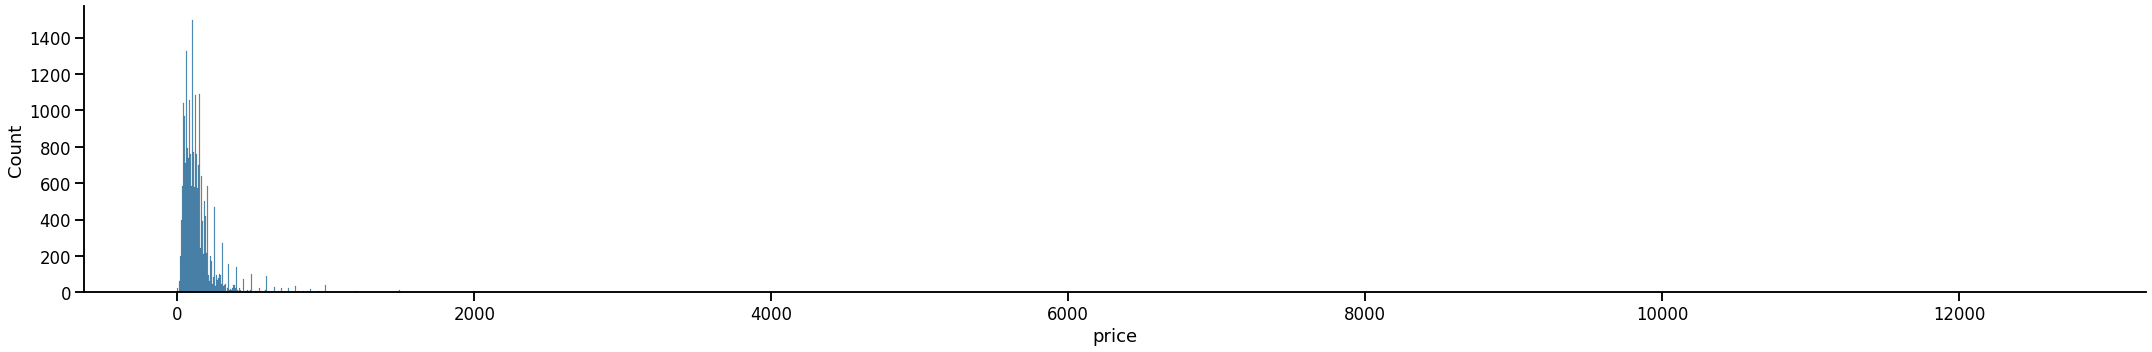

In [ ]:
# Distribución de la variable price
seaborn.displot(df_airbnb['price'], aspect=6)
plt.ticklabel_format(style='plain', axis='x')

Consideramos como valores atípicos para la variable price a aquellos precios que superan al cuantil 0,998.

In [ ]:
# Quitamos los valores atípicos para la variable price
q998=df_airbnb['price'].quantile(0.998)

df_airbnb = df_airbnb[df_airbnb['price']<=q998]

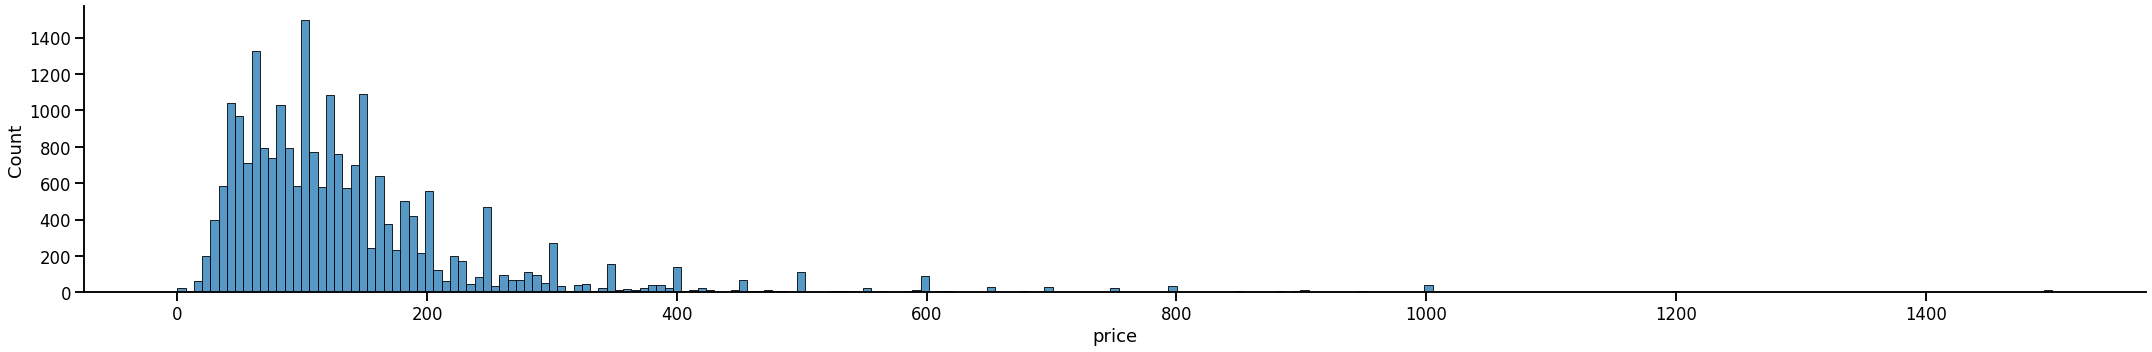

In [ ]:
# Distribución de la variable price sin valores atípicos
seaborn.displot(df_airbnb['price'], aspect=6)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
# Medidas resumen de la variable price sin valores atípicos
df_airbnb['price'].describe()

count    22852.000000
mean       142.640732
std        130.043500
min          0.000000
25%         71.000000
50%        109.000000
75%        165.000000
max       1501.000000
Name: price, dtype: float64

**Exploración de la variable monthly_price**

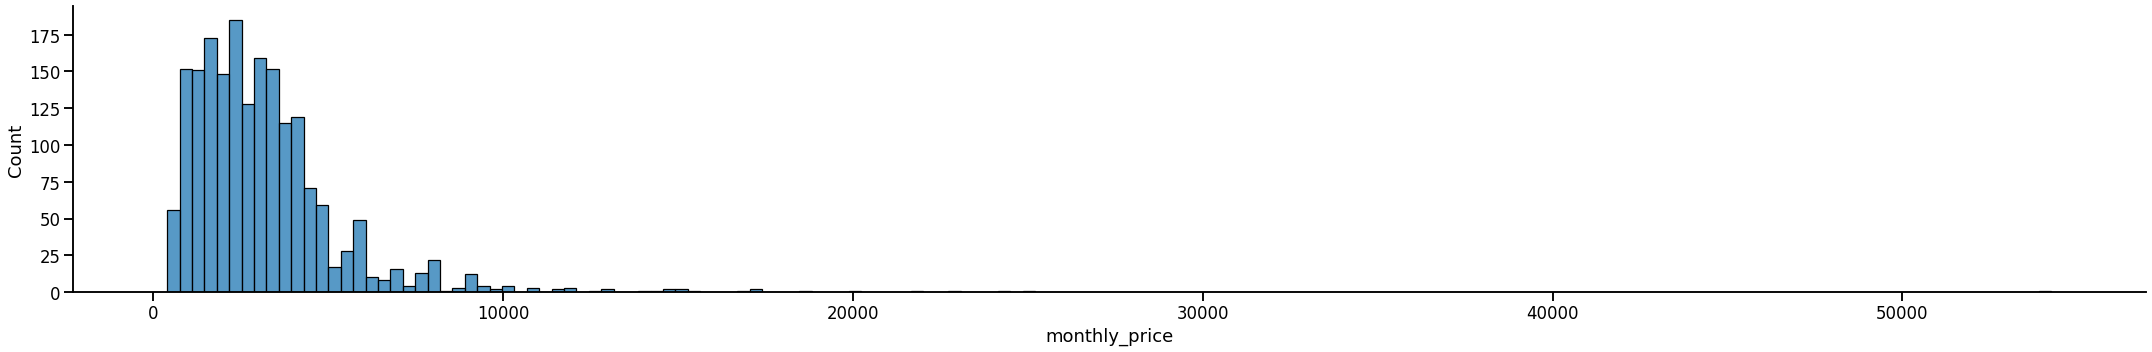

In [ ]:
# Distribución de la variable monthly_price
seaborn.displot(df_airbnb['monthly_price'], aspect=6)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
# Medidas resumen de la variable monthly_price
df_airbnb['monthly_price'].describe()

count     1889.000000
mean      3200.462679
std       2608.618552
min        400.000000
25%       1700.000000
50%       2800.000000
75%       3900.000000
max      54258.000000
Name: monthly_price, dtype: float64

**Exploración de la variable weekly_price**

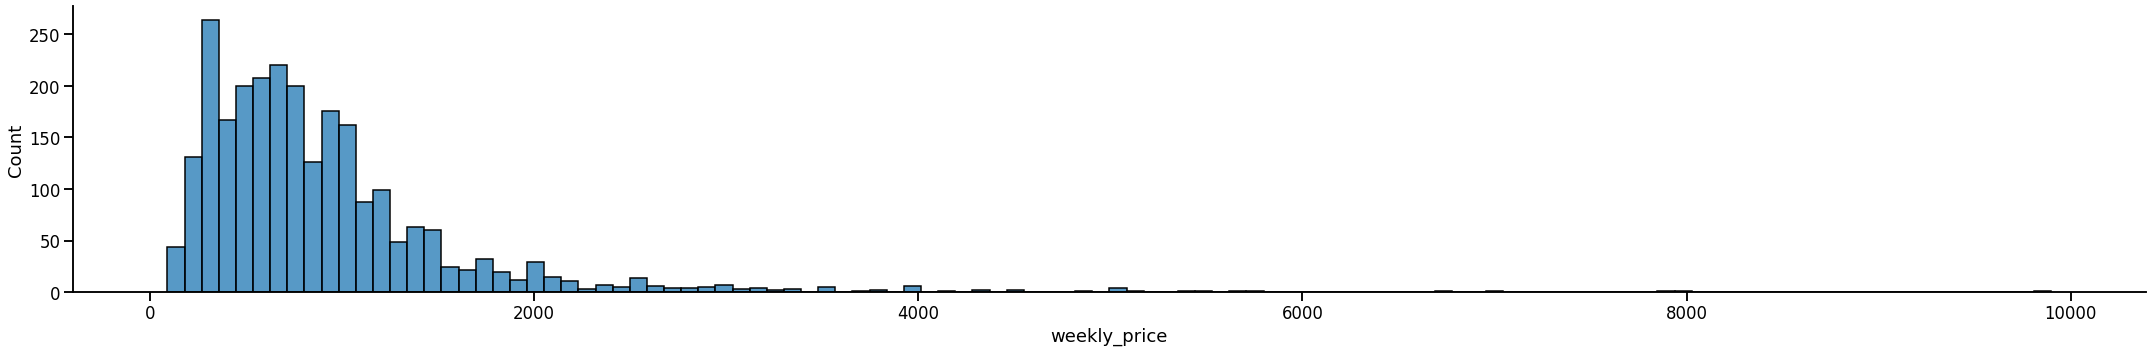

In [ ]:
# Distribución de la variable weekly_price
seaborn.displot(df_airbnb['weekly_price'], aspect=6)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
# Medidas resumen de la variable weekly_price
df_airbnb['weekly_price'].describe()

count    2520.000000
mean      891.958333
std       729.128422
min        91.000000
25%       450.000000
50%       747.000000
75%      1060.000000
max      9899.000000
Name: weekly_price, dtype: float64

Notar que las variables price, monthly_price y weekly_price tienen distribuciones asimétricas a derecha. Por esta razón creemos conveniente utilizar la mediana en lugar de la media como medida de posición central. 

**Exploración de la variable zipcode**

In [ ]:
# Freciuencias absolutas zipcode para df_airbnb
zipcode_count = df_airbnb.zipcode.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Zipcode', 'zipcode': 'frequency'})
zipcode_count[:10]

,Zipcode,frequency
0,3000.0,3363
1,3006.0,1263
2,3182.0,1133
3,3141.0,877
4,3004.0,727
5,3121.0,628
6,3008.0,616
7,3053.0,538
8,3181.0,460
9,3056.0,446


In [ ]:
# Medidas resumen para las frecuencias de zipcode
df_airbnb.zipcode.value_counts().describe()

count     247.000000
mean       91.931174
std       261.520444
min         1.000000
25%         8.500000
50%        27.000000
75%        73.000000
max      3363.000000
Name: zipcode, dtype: float64

Tomaremos aquellos zipcodes con frecuencias mayores o iguales a 9, ya que a partir de esa frecuencias creemos que son relevantes. 

In [ ]:
# Quitamos de la base df_airbnb aquellos zipcodes con frecuencias menores a 9
zipcode_principales= zipcode_count[zipcode_count['frequency'] >= 9]

df_airbnb = df_airbnb[df_airbnb['zipcode'].isin(zipcode_principales['Zipcode'])]

In [ ]:
df_airbnb['zipcode'].value_counts().describe()

count     185.000000
mean      121.427027
std       296.565882
min         9.000000
25%        21.000000
50%        42.000000
75%       104.000000
max      3363.000000
Name: zipcode, dtype: float64

A continuación agrupamos los precios, precios semanales y precios mensuales por código postal tomando la mediana, ya que vimos en el análisis exploratorio que las distribuciones son asimétricas a derecha. 

In [ ]:
# Agrupación de los precios por códigos postales de la base df_airbnb considerando la mediana.
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']

# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = df_airbnb[relevant_cols].groupby('zipcode')\
  .agg({'price': ['median', 'count'], 'weekly_price': 'median',
        'monthly_price': 'median'})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price median': 'airbnb_price_median',
             'price count': 'airbnb_record_count',
             'weekly_price median': 'airbnb_weekly_price_median',
             'monthly_price median': 'airbnb_monthly_price_median'}
)

In [ ]:
airbnb_price_by_zipcode[:10]

,zipcode,airbnb_price_median,airbnb_record_count,airbnb_weekly_price_median,airbnb_monthly_price_median
0,3000.0,129.0,3363,857.0,3469.0
1,3002.0,130.0,196,775.0,3300.0
2,3003.0,120.0,267,728.0,2500.0
3,3004.0,130.0,727,1000.0,3895.0
4,3006.0,150.0,1263,1099.5,3955.0
5,3008.0,138.0,616,850.0,2902.0
6,3011.0,65.0,198,350.0,1300.0
7,3012.0,90.5,76,365.0,1900.0
8,3013.0,108.5,82,800.0,2000.0
9,3015.0,96.0,65,559.5,1974.0


Por último combinamos las bases df_melb y df_airbnb a través de un left merge. 

In [ ]:
# Unión de las bases de datos df_melb y airbnb_price_by_zipcode a izquierda
merged_sales_df = df_melb.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df.sample(5)

,Suburb,Regionname,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,...,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,zipcode,airbnb_price_median,airbnb_record_count,airbnb_weekly_price_median,airbnb_monthly_price_median
8320,St Kilda,Southern Metropolitan,3,u,1190000.0,29/04/2017,6.1,3182.0,3.0,1.0,...,140.0,1955.0,-37.86230,144.97720,13240.0,3182.0,118.0,1133.0,815.0,3100.0
9227,Tullamarine,Western Metropolitan,2,t,355000.0,3/06/2017,12.9,3043.0,2.0,1.0,...,NaN,NaN,-37.68837,144.87122,3296.0,3043.0,71.0,29.0,700.0,1502.0
5847,St Kilda,Southern Metropolitan,2,u,580000.0,27/11/2016,6.1,3182.0,2.0,1.0,...,102.0,1995.0,-37.85680,144.98730,13240.0,3182.0,118.0,1133.0,815.0,3100.0
6691,Yarraville,Western Metropolitan,3,h,840000.0,28/08/2016,7.0,3013.0,4.0,1.0,...,127.0,1970.0,-37.82200,144.89040,6543.0,3013.0,108.5,82.0,800.0,2000.0
10063,Epping,Northern Metropolitan,3,h,573000.0,27/05/2017,19.6,3076.0,3.0,2.0,...,125.0,1990.0,-37.64097,145.05757,10926.0,3076.0,48.0,17.0,435.0,1620.0


In [ ]:
len(merged_sales_df)

13096

### Ejercicio 2: 3) 

212
count     148
unique      4
top         1
freq       99
Name: unique, dtype: int64


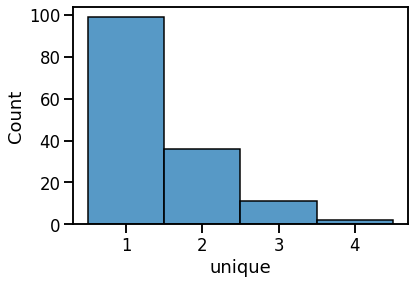

In [ ]:
# Analisis de distribucion de suburbios por codigo postal
suburb_list = df_melb.Suburb.unique()
print(len(suburb_list))
df_melb_postcode = df_melb.groupby('Postcode').Suburb.describe().unique
print(df_melb_postcode.describe())
seaborn.histplot(df_melb_postcode, discrete = True)
# plt.ticklabel_format(style='plain', axis='x')


**Variable 1:** Latitud y Longitud

Asumiendo que se cuenta con los algoritmos necesarios para dividir al área que se investiga en subareas cuadradas de igual superficie, definidas por la geoposición (latitud y longitud) de sus cuatro vertices, a cada propiedad le corresponderia estar en determinada área. 

Si a las dos bases de datos le sumamos una columna llamada "SubAreaID" podriamos combinarlas en base a dicha columna. 
Si bien tiene como ventaja que si se elige un tamaño de area pequeño podremos combinar de mejor manera la base de Airbnb a la de Melbourne, se requiere realizar una operacion de transformación por fila de los valores de longitud y latitud al valor SubAreaID.

Más allá del costo computacional que esta combinacion implicaría, creemos que es adecuado hacerla porque se podria hacer una predicción más precisa del precio de determinada propiedad.

**Variable 2:** Suburb

Si se puede contar con las equivalencias entre suburbios de ambas bases de datos, se podrian combinar mediante la variable "Suburb" posterior a hacer la curación necesaria.

Consideramos que si se tiene a disposición la gente necesaria para encontrar las equivalencias, la variable puede ser adecuada para realizar la combinación de las bases de datos debido a que un suburbio representa un área geográfica menor o igual al código postal, por lo que al menos la predicción va a ser igual de precisa que el metodo de combinación por código postal.


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
# Creamos el nuevo conjunto de datos
merged_sales_df.to_csv("melb_data_extended.csv", index=None)

In [ ]:
# Guardamos el nuevo conjunto de datos
from google.colab import files
files.download('melb_data_extended.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)